# Cluster Analysis I

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import cluster

import warnings
warnings.filterwarnings('ignore')

## Load in data: Breast Cancer Wisconsin

In [2]:
col_names = ['ID', 'Diagnosis', 
             'radius1', 'texture1', 'perimeter1', 'area1','smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
             'radius2', 'texture2', 'perimeter2', 'area2','smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 
             'radius3', 'texture3', 'perimeter3', 'area3','smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

In [3]:
df = pd.read_csv('wdbc.data', sep='\s+', header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
%%capture
print(df.isnull().values.any(),'\n', df.dtypes)

In [5]:
df.columns = col_names
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Load in data: Waveform Database Generator

In [6]:
df2 = pd.read_csv('waveform.data', sep='\s+', header=None)
df2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.6,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.3,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1


In [7]:
%%capture
print(df2.isnull().values.any(),'\n', df2.dtypes)

In [8]:
df2.rename(columns={21: 'class'}, inplace=True)
df2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,1
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


# Part 1: Breast Cancer Wisconsin
1. Perform k-means clustering on different datasets (use k = 1, 2, 3,..., 6)
2. Calculate the SSE and plot sum-of-squared errors (SSE) versus k
3. Find the best k using the elbow approach 
4. Find the centers of clusters and  find the top-5 closest points to the center of each cluster

In [9]:
# must remove the 'id' and 'class' columns first before applying the clustering
data = df.drop(['ID', 'Diagnosis'], axis=1)
data.head(2)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Text(0.5, 1.0, 'Number of Clusters (k) vs. SSE')

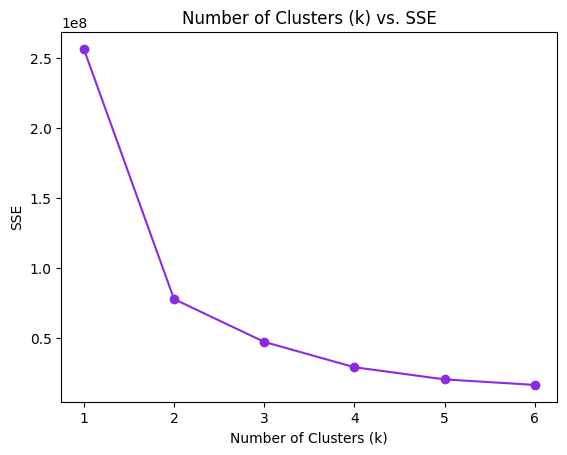

In [10]:
numClusters = [1,2,3,4,5,6]
SSE = []

for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, marker='o', color='blueviolet')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Number of Clusters (k) vs. SSE')

*Figure 1: Number of Clusters (k) vs. SSE*
- We can see that the **best k = 2** where `n_clusters=2` because at that point is where the SSE starts to decrease linearly

In [11]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=df.ID, columns=['Cluster'])

,Cluster
ID,
842302,1
842517,1
84300903,1
84348301,0
84358402,1
...,...
926424,1
926682,1
926954,0


In [12]:
# Find the centers of clusters given best k
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns=data.columns)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,12.556299,18.570365,81.123470,496.061872,0.094884,0.091100,0.062438,0.033433,0.178058,0.063454,...,14.043902,24.709543,91.937511,619.647945,0.129959,0.223312,0.219215,0.091330,0.283554,0.083282
1,19.379924,21.694580,128.231298,1185.929771,0.101295,0.148613,0.176939,0.100699,0.191540,0.060603,...,23.709466,28.912672,158.496183,1753.022901,0.140425,0.357758,0.449306,0.192431,0.311882,0.086165


Code from lab:

In [13]:
# find the top-5 closest points to the center of each cluster
# use '.transform' to get distance between objects and centroids
# d = km.transform(x)[i,j] - j as unique cluster id

def get_points(func, X, N, cluster_id):
    closest = np.argsort(func.transform(X)[:, cluster_id])[:N] # return closest 
    print(f'____________The Top 5 Points to Cluster {cluster_id}____________')
    for i in closest:
        print(f'\n[ Data in row: {i} ]')
        print(X.iloc[i])
        print('\n')

In [14]:
def loop_de_loop(func, X, N, cluster_id):
    for i in cluster_id:
        result = get_points(func, X, N, i)
    return result

In [15]:
num_clusters = list(range(0, centroids.shape[0])) # [0, 1]
loop_de_loop(k_means, data, 5, num_clusters)

____________The Top 5 Points to Cluster 0____________

[ Data in row: 519 ]
radius1                12.750000
texture1               16.700000
perimeter1             82.510000
area1                 493.800000
smoothness1             0.112500
compactness1            0.111700
concavity1              0.038800
concave_points1         0.029950
symmetry1               0.212000
fractal_dimension1      0.066230
radius2                 0.383400
texture2                1.003000
perimeter2              2.495000
area2                  28.620000
smoothness2             0.007509
compactness2            0.015610
concavity2              0.019770
concave_points2         0.009199
symmetry2               0.018050
fractal_dimension2      0.003629
radius3                14.450000
texture3               21.740000
perimeter3             93.630000
area3                 624.100000
smoothness3             0.147500
compactness3            0.197900
concavity3              0.142300
concave_points3         0.080450


# Part 2: Breast Cancer Wisconsin
1. Perform hierarchical  clustering (Single Link, Complete Link, and Group Average) on different data sets 
2. Draw a dendrogram diagram for each case (use appropriate options of the dendrogram to draw a nice visualization). See resource (3)

## Single Link 

Text(0.5, 0, 'IDs')

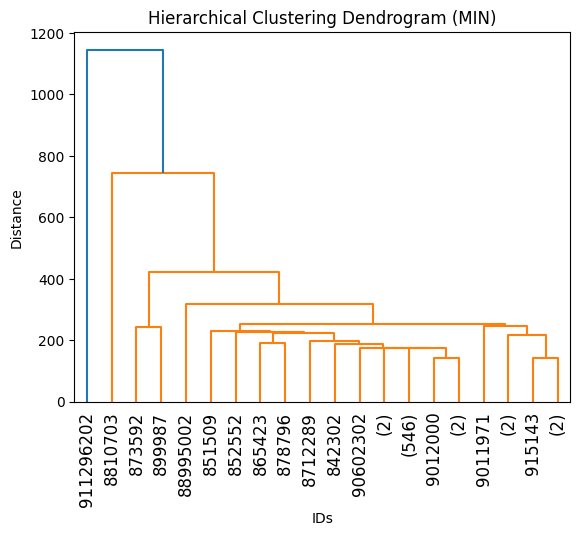

In [16]:
from scipy.cluster import hierarchy

label = df['ID'].tolist() # unique IDs in 'df' before removing columns ['ID', 'Diagnosis'] in 'data'

Z = hierarchy.linkage(data.to_numpy(), 'single') # pass 'data' subset
dn = hierarchy.dendrogram(Z, labels=label, truncate_mode='lastp', p=20, orientation='top', leaf_rotation=90)

plt.title('Hierarchical Clustering Dendrogram (MIN)')
plt.ylabel('Distance')
plt.xlabel('IDs')

*Figure 2: Hierarchical Clustering Dendrogram (MIN)*
- Single linkage will use the smallest of all pair-wise similarites between points

## Complete Link

Text(0.5, 0, 'IDs')

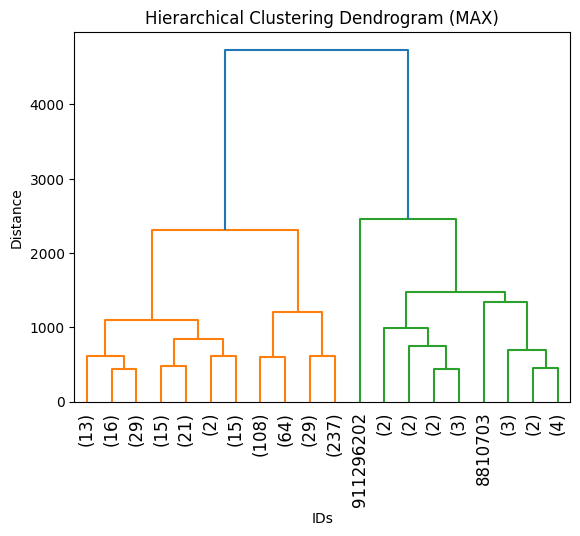

In [17]:
Z = hierarchy.linkage(data.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z, labels=label, truncate_mode='lastp', p=20, orientation='top', leaf_rotation=90)

plt.title('Hierarchical Clustering Dendrogram (MAX)')
plt.ylabel('Distance')
plt.xlabel('IDs')

*Figure 3: Hierarchical Clustering Dendrogram (MAX)*
- Complete linkage will use the largest of all pair-wise similarites between points

## Group Average

Text(0.5, 0, 'IDs')

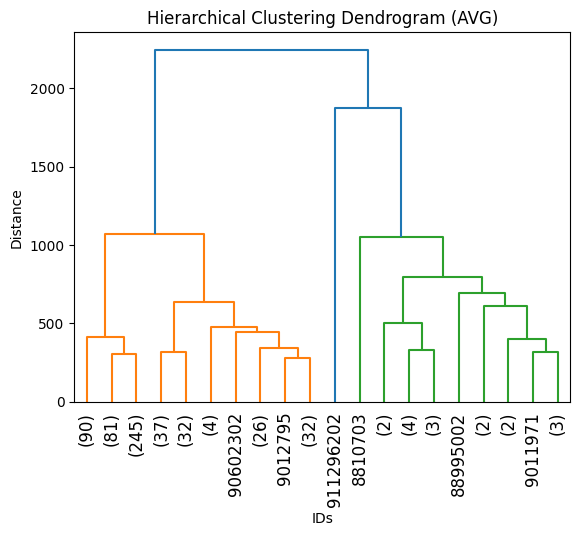

In [18]:
Z = hierarchy.linkage(data.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z, labels=label, truncate_mode='lastp', p=20, orientation='top', leaf_rotation=90)

plt.title('Hierarchical Clustering Dendrogram (AVG)')
plt.ylabel('Distance')
plt.xlabel('IDs')

*Figure 4: Hierarchical Clustering Dendrogram (AVG)*
- Average linkage will use the average of all pair-wise similarites between points

***

# Part 1: Waveform Database Generator
1. Perform k-means clustering on different datasets (use k = 2, 3,..., 6)
2. Calculate the SSE and plot sum-of-squared errors (SSE) versus k
3. Find the best k using the elbow approach 
4. Find the centers of clusters and  find the top-5 closest points to the center of each cluster

In [19]:
# must remove the 'class' column first before applying the clustering
data2 = df2.drop('class', axis=1)
data2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.23,-1.56,-1.75,-0.28,0.6,2.22,0.85,0.21,-0.20,0.89,...,4.20,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56
1,-0.69,2.43,0.61,2.08,2.3,3.25,5.52,4.55,2.97,2.22,...,1.61,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42


Text(0.5, 1.0, 'Number of Clusters (k) vs. SSE')

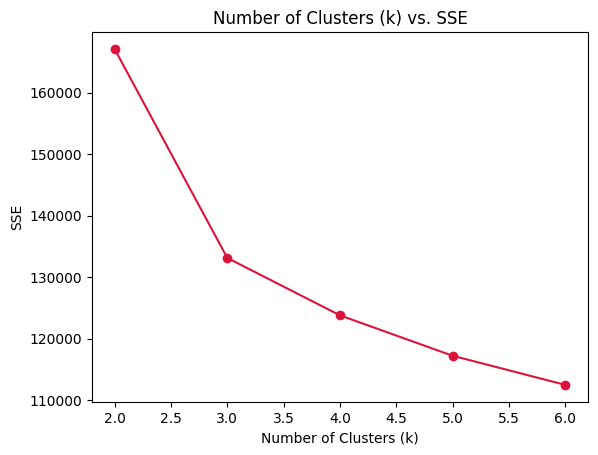

In [20]:
numClusters = [2,3,4,5,6]
SSE = []

for k in numClusters:
    k_means2 = cluster.KMeans(n_clusters=k)
    k_means2.fit(data2)
    SSE.append(k_means2.inertia_)

plt.plot(numClusters, SSE, marker='o', color='crimson')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Number of Clusters (k) vs. SSE')

*Figure 5: Number of Clusters (k) vs. SSE*
- We can see that the **best k = 3** where `n_clusters=3` because at that point is where the SSE starts to decrease linearly.

In [21]:
# create integer labels for each feature
label2 = list(range(1, len(data2.index) + 1))

In [22]:
k_means2 = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means2.fit(data2) 
labels = k_means2.labels_
pd.DataFrame(labels, index=label2, columns=['Cluster'])

,Cluster
1,1
2,0
3,0
4,2
5,2
...,...
4996,1
4997,0
4998,2
4999,1


In [23]:
# Find the centers of clusters 
centroids_ = k_means2.cluster_centers_
pd.DataFrame(centroids_, columns=data2.columns)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.009663,0.726908,1.444703,2.190932,2.930859,3.810786,4.705533,4.114540,3.540814,3.105988,...,1.879630,1.077750,1.007419,0.961936,0.729966,0.436818,0.318597,0.228378,0.118816,-0.054153
1,-0.005143,0.132349,0.257690,0.366029,0.461007,0.754571,0.997547,1.060341,1.086782,1.807085,...,3.056540,3.524928,4.074477,4.664202,3.792426,2.925303,2.199565,1.456469,0.776832,-0.012646
2,0.012750,0.112693,0.228036,0.277407,0.352529,1.302786,2.221593,2.883093,3.624950,4.373707,...,4.401271,3.618336,2.886100,2.174750,1.290779,0.413250,0.311829,0.180414,0.116064,0.009000


In [24]:
num_clusters2 = list(range(0, centroids_.shape[0])) # [0, 1, 2]
loop_de_loop(k_means2, data2, 5, num_clusters2)

____________The Top 5 Points to Cluster 0____________

[ Data in row: 4107 ]
0     0.36
1     0.51
2     1.92
3     0.95
4     3.39
5     3.70
6     5.07
7     4.50
8     3.35
9     3.41
10    2.02
11    1.97
12    1.93
13    0.60
14    1.16
15    1.48
16    0.68
17    1.64
18   -0.23
19    0.08
20    0.46
Name: 4107, dtype: float64



[ Data in row: 1936 ]
0    -1.00
1     0.63
2     1.59
3     1.23
4     2.81
5     4.22
6     4.99
7     3.59
8     3.15
9     3.20
10    2.56
11    1.74
12   -0.24
13    0.14
14    1.29
15    0.54
16   -0.38
17    0.67
18    0.95
19    0.52
20    0.55
Name: 1936, dtype: float64



[ Data in row: 1072 ]
0    -0.56
1     0.60
2     2.21
3     2.82
4     3.33
5     3.72
6     5.93
7     3.98
8     3.01
9     3.41
10    3.20
11    1.64
12    0.18
13    0.41
14    0.44
15    1.66
16    0.42
17   -0.30
18    0.46
19   -0.55
20    0.49
Name: 1072, dtype: float64



[ Data in row: 2107 ]
0     1.00
1     2.44
2     1.27
3     1.84
4     2.67
5     3.65
6     5.

# Part 2: Waveform Database Generator
1. Perform hierarchical  clustering (Single Link, Complete Link, and Group Average) on different data sets 
2. Draw a dendrogram diagram for each case (use appropriate options of the dendrogram to draw a nice visualization). See resource (3)

## Single Link 

Text(0.5, 0, 'IDs')

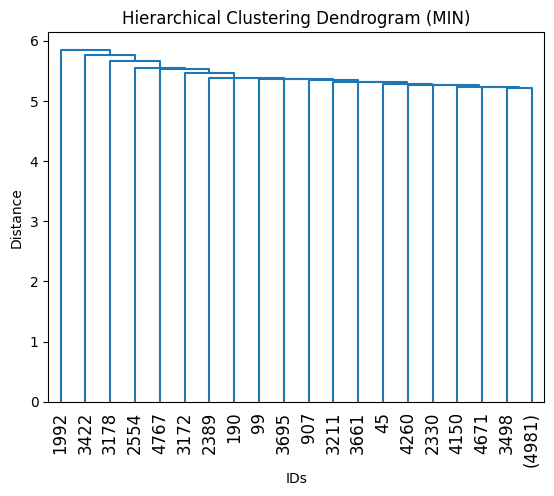

In [25]:
Z = hierarchy.linkage(data2.to_numpy(), 'single') # pass 'data2' subset
dn = hierarchy.dendrogram(Z, labels=label2, truncate_mode='lastp', p=20, orientation='top', leaf_rotation=90)

plt.title('Hierarchical Clustering Dendrogram (MIN)')
plt.ylabel('Distance')
plt.xlabel('IDs')

*Figure 6: Hierarchical Clustering Dendrogram (MIN)*
- Single linkage will use the smallest of all pair-wise similarites between points

## Complete Link

Text(0.5, 0, 'IDs')

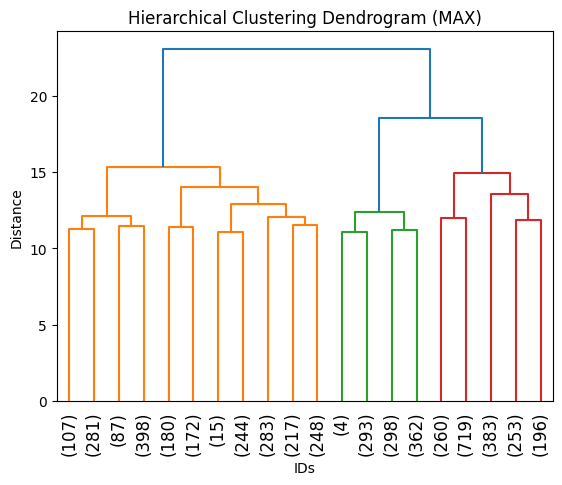

In [26]:
Z = hierarchy.linkage(data2.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z, labels=label2, truncate_mode='lastp', p=20, orientation='top', leaf_rotation=90)

plt.title('Hierarchical Clustering Dendrogram (MAX)')
plt.ylabel('Distance')
plt.xlabel('IDs')

*Figure 7: Hierarchical Clustering Dendrogram (MAX)*
- Complete linkage will use the largest of all pair-wise similarites between points

## Group Average

Text(0.5, 0, 'IDs')

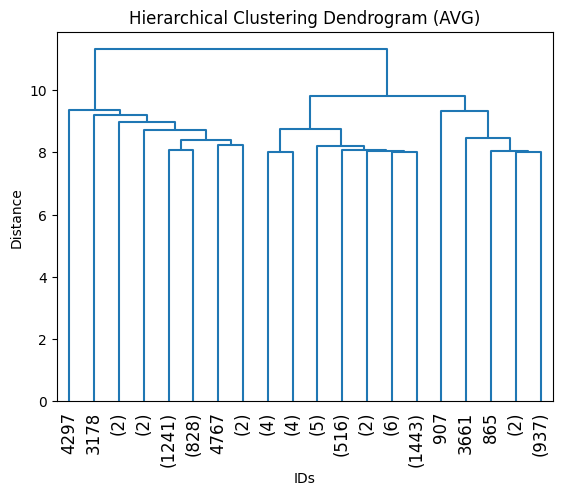

In [27]:
Z = hierarchy.linkage(data2.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z, labels=label2, truncate_mode='lastp', p=20, orientation='top', leaf_rotation=90)

plt.title('Hierarchical Clustering Dendrogram (AVG)')
plt.ylabel('Distance')
plt.xlabel('IDs')

*Figure 8: Hierarchical Clustering Dendrogram (AVG)*
- Average linkage will use the average of all pair-wise similarites between points